In [19]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from tqdm import tqdm
import h5py
import tifffile as tiff
from typing import Literal
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import re

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Visualize Wandb logs

In [2]:
log_file="logs/logs/08-10-2025_T19-47-09.log"

In [6]:
rule = r"Epoch\s+(\d+)/\d+.*?,\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),"
df = pd.DataFrame(columns=["Epoch", "Loss", "MSE", "L1", "Sobel", "SSIM", "SSIM3D"])
df.index.name = "Epoch"
for line in tqdm(open(log_file).readlines()):
    match = re.search(rule, line)
    if match:
        df.loc[len(df)] = [int(match.group(1))] + [float(match.group(i)) for i in range(2, 8)]

100%|██████████| 76653/76653 [01:12<00:00, 1058.63it/s]


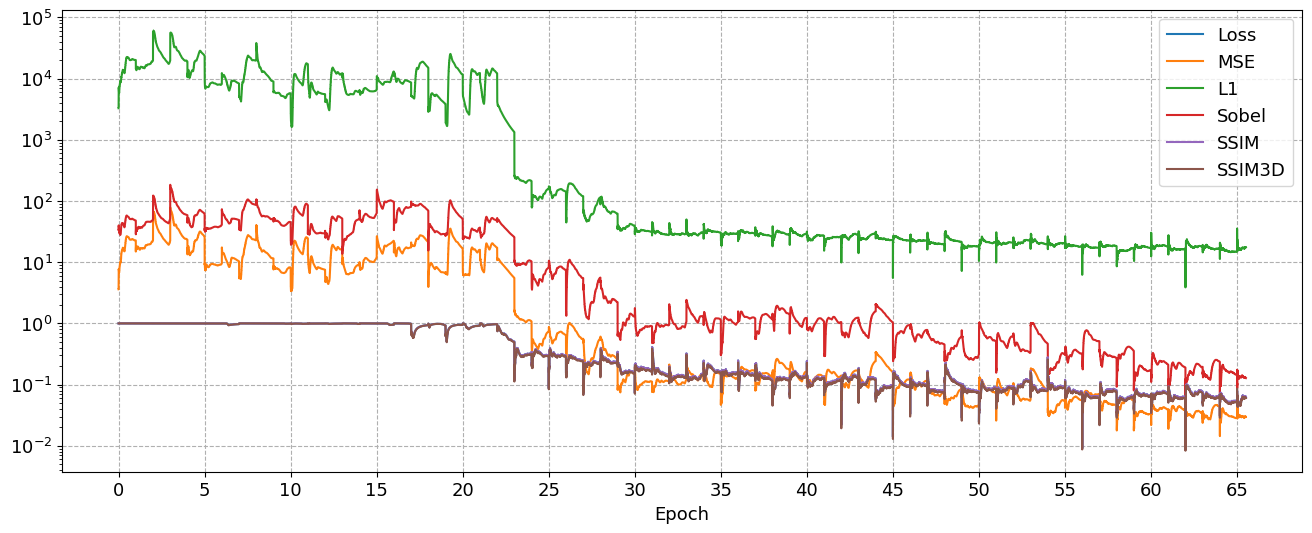

In [7]:
ax = df.drop(columns="Epoch").rolling(1).mean().plot(figsize=(16, 6))
ax.set_yscale("log")
ax.set_xticks(range(0, len(df), len(df[df["Epoch"] == 1])*5));
ax.set_xticklabels(range(0,int(df.iloc[-1]["Epoch"])+1,5));

## Visualize Preditions

In [ ]:
h5file = h5py.File("dataset/Denoising/Demo.h5",libver='latest',mode='r')
keys = list(h5file.keys())
h5file["14/noisy_im"]

In [20]:
test_tif="logs/images/finetuning_astro__08-15-2025_T16-49-41_epoch-30/14.tif"
rec=Recording(test_tif,max_frames=None)

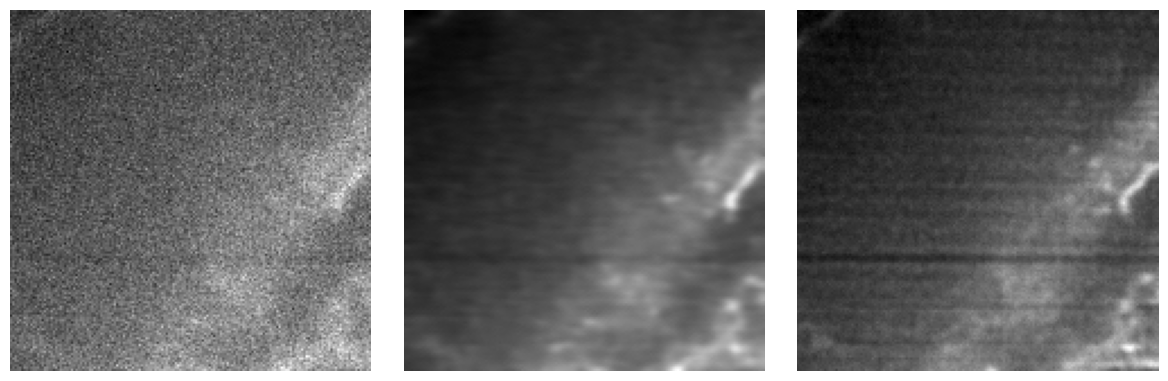

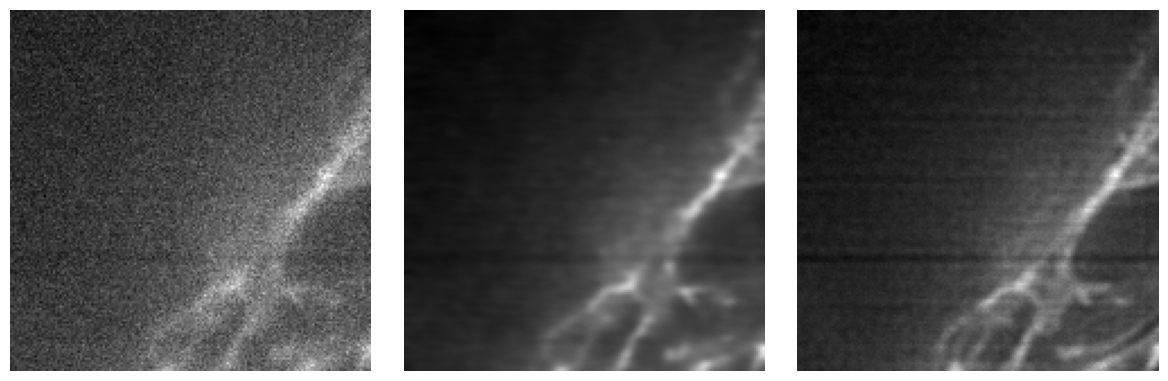

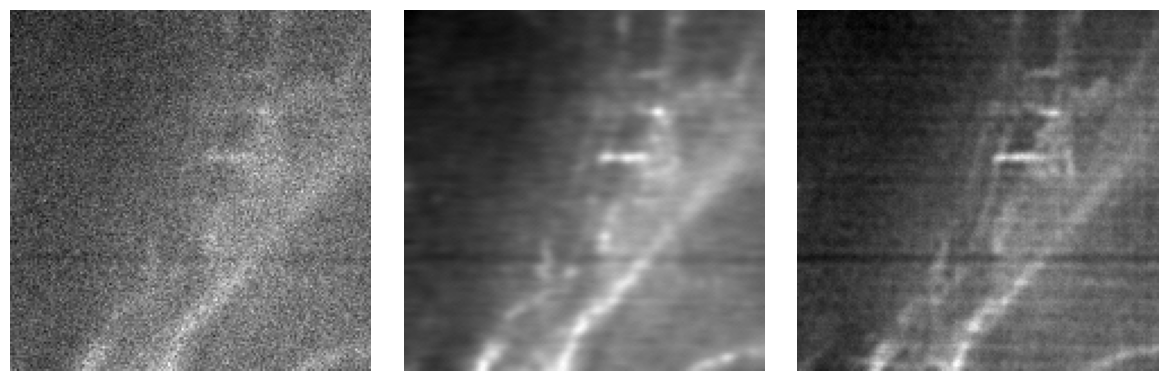

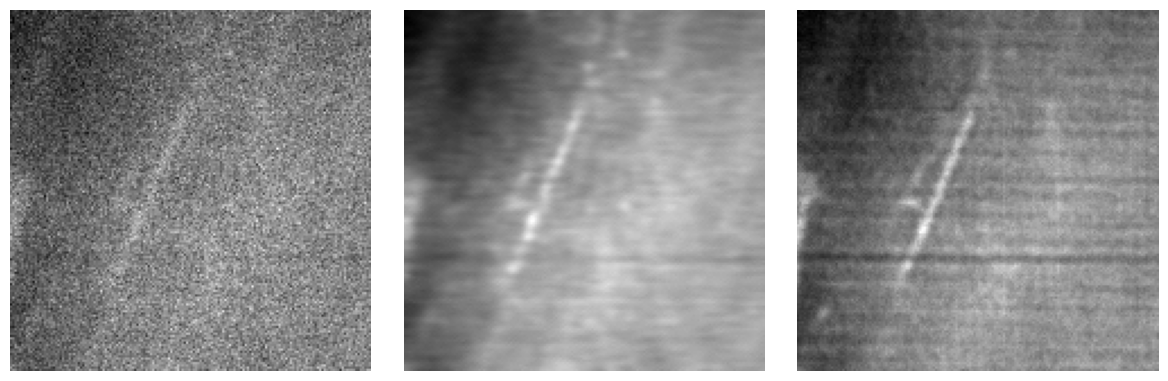

In [21]:
for np in rec.np[::4]:
    imshow([_ for _ in np])